# Cayque Guilherme, Alvaro Ragazzi, Gustavo Zanca

## Imports

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Average, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools 
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

### Definindo diretórios

In [2]:
train_path = 'data/dogs-vs-cats/train'
valid_path = 'data/dogs-vs-cats/valid'
test_path = 'data/dogs-vs-cats/test'

### batches

In [113]:
print("Imagens de Treinamento")
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=train_path, target_size=(112,112), classes=['cat','dog'], batch_size=140)

print("Imagens de Teste")
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=train_path, target_size=(112,112), classes=['cat','dog'], batch_size=140)

print("Imagens de Validação")
valida_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=train_path, target_size=(112,112), classes=['cat','dog'], batch_size=140)


Imagens de Treinamento
Found 140 images belonging to 2 classes.
Imagens de Teste
Found 140 images belonging to 2 classes.
Imagens de Validação
Found 140 images belonging to 2 classes.


### Exibir imgs e labels aleatorias

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(112, 112, 3)


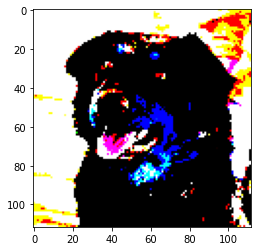

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(112, 112, 3)


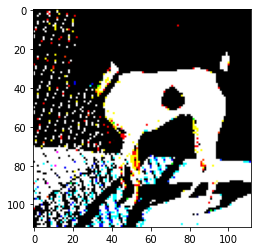

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(112, 112, 3)


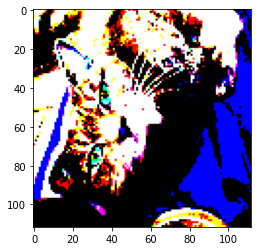

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(112, 112, 3)


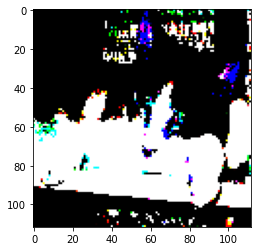

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(112, 112, 3)


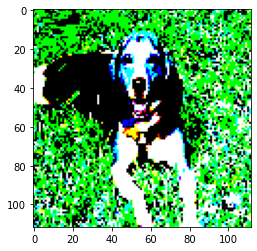

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [84]:
%matplotlib inline

imgs, labels = next(train_batches)

def plotImages(images_arr):
    for img in images_arr:
        print(img.shape)
        plt.imshow(img)
        plt.show()

plotImages(imgs)
print(labels)


### SEM O BatchNormalization

from tensorflow.keras.layers import InputLayer

model = Sequential()
model.add(InputLayer(input_shape=(112,112,3))) #camada de entrada
model.add(Dense(64, activation='relu')) # camada oculta
model.add(Dense(32, activation='relu')) #camada oculta
model.add(Dense(units=2, activation='softmax'))

model.summary()

### COM O BatchNormalization

In [5]:
from tensorflow.keras.layers import InputLayer

model = Sequential()
model.add(InputLayer(input_shape=(112,112,3))) #camada de entrada
model.add(Dense(64, activation='relu')) # camada oculta
model.add(BatchNormalization()) #Normalização mantém a saída próxima a 0 e o desvio padrão próximo a 1
model.add(Dense(32, activation='relu')) #camada oculta
model.add(Flatten())
model.add(Dense(units=2, activation='softmax'))

# Salvando Arquivo

In [117]:
model.save('P1_topicos.h5')

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 112, 112, 64)      256       
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 64)     256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 112, 112, 32)      2080      
                                                                 
 flatten (Flatten)           (None, 401408)            0         
                                                                 
 dense_2 (Dense)             (None, 2)                 802818    
                                                                 
Total params: 805,410
Trainable params: 805,282
Non-trainable params: 128
________________________________________________

In [7]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
print(train_batches)
print(valida_batches)

In [9]:
model.fit(x=train_batches, validation_data=valida_batches, epochs=5, verbose=2)

Epoch 1/5
28/28 - 4s - loss: 48.2849 - accuracy: 0.5500 - val_loss: 82.9495 - val_accuracy: 0.5786 - 4s/epoch - 130ms/step
Epoch 2/5
28/28 - 2s - loss: 7.4146 - accuracy: 0.8286 - val_loss: 9.2980 - val_accuracy: 0.8357 - 2s/epoch - 87ms/step
Epoch 3/5
28/28 - 2s - loss: 3.9153 - accuracy: 0.8857 - val_loss: 1.4186 - val_accuracy: 0.9429 - 2s/epoch - 88ms/step
Epoch 4/5
28/28 - 2s - loss: 2.2267 - accuracy: 0.9214 - val_loss: 1.6665 - val_accuracy: 0.9571 - 2s/epoch - 86ms/step
Epoch 5/5
28/28 - 2s - loss: 2.9388 - accuracy: 0.9214 - val_loss: 1.8223 - val_accuracy: 0.9286 - 2s/epoch - 84ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(112, 112, 3)
(112, 112, 3)
(112, 112, 3)
(112, 112, 3)
(112, 112, 3)


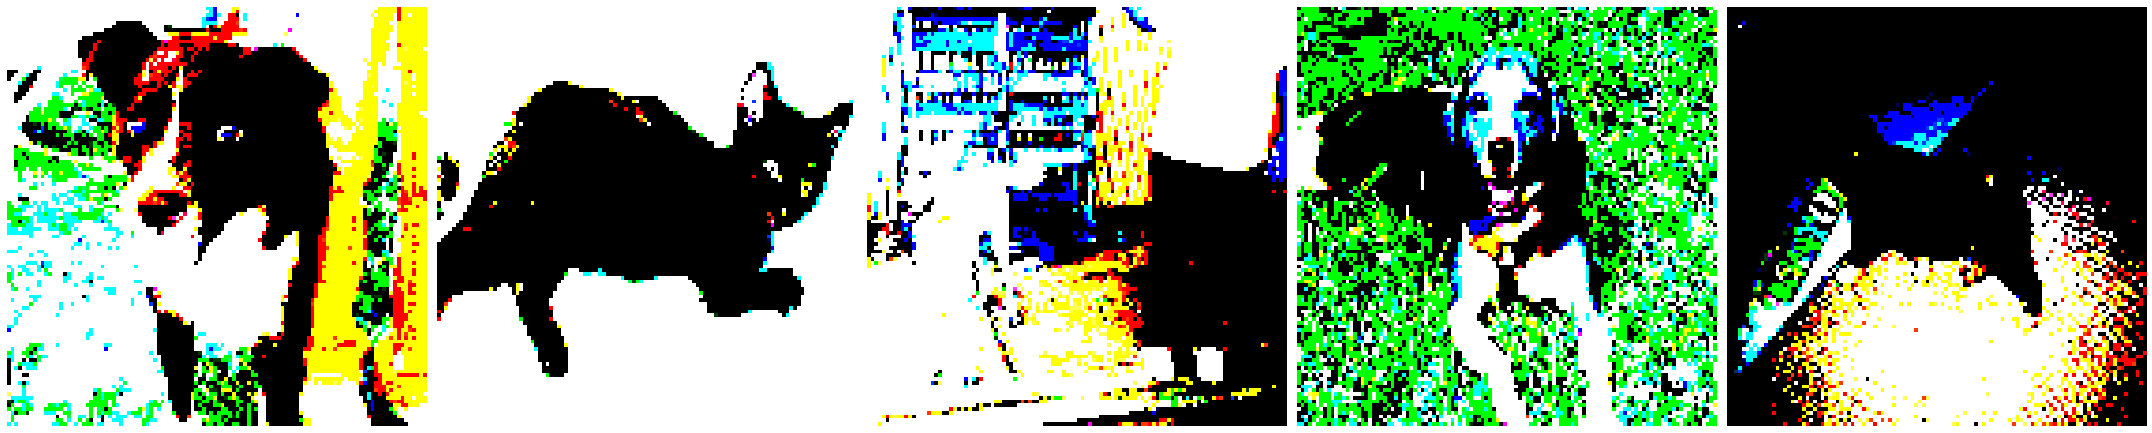

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [10]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [11]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
predictions = model.predict(x=test_batches, verbose=1)

28/28 [==============================] - 1s 23ms/step


In [13]:
for i in predictions:
    print(i)

[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[1.000000e+00 6.441325e-33]
[0. 1.]
[2.4196028e-20 1.0000000e+00]
[1. 0.]
[1.000000e+00 7.055395e-15]
[1. 0.]
[1.5639454e-16 1.0000000e+00]
[1. 0.]
[4.9311308e-05 9.9995065e-01]
[1.0000000e+00 1.8847313e-15]
[4.819136e-28 1.000000e+00]
[0. 1.]
[1. 0.]
[8.856898e-18 1.000000e+00]
[0.9759212 0.0240788]
[1. 0.]
[5.307927e-29 1.000000e+00]
[1. 0.]
[2.2124184e-38 1.0000000e+00]
[0. 1.]
[0. 1.]
[1.0000000e+00 2.1752243e-08]
[1. 0.]
[1. 0.]
[1.0000000e+00 5.8734383e-28]
[3.9022933e-23 1.0000000e+00]
[1.0831755e-26 1.0000000e+00]
[1.0000000e+00 2.4373564e-13]
[1.7295536e-22 1.0000000e+00]
[1. 0.]
[1. 0.]
[1.0000000e+00 2.0725787e-16]
[1. 0.]
[1. 0.]
[1.4103e-32 1.0000e+00]
[1.0000000e+00 1.6384959e-29]
[0. 1.]
[1. 0.]
[1.0884398e-19 1.0000000e+00]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1.1798012e-19 1.0000000e+00]
[5.777049e-26 1.000000e+00]
[0.05249136 0.9475087 ]
[1.0000000e+00 3.6799975e-18]
[0. 1.]
[1. 0.]
[4.480136e

In [14]:
rounded_predictions = np.argmax(predictions,axis=-1)

In [15]:
for i in rounded_predictions:
    print(i)

1
0
1
1
1
0
1
1
0
0
0
1
0
1
0
1
1
0
1
0
0
1
0
1
1
1
0
0
0
0
1
1
0
1
0
0
0
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
1
1
1
0
1
0
1
0
1
0
0
1
0
0
0
1
0
0
1
0
0
1
0
1
1
0
0
0
1
1
1
0
1
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
0
0
0
1
1
0
1
0
0
1
1
0
0
1
0
0
0
0
1
0
1
1
1
1
1
0
0
1
0
1
0
1
1
0
0
1
1
0
0


In [16]:
print(len(rounded_predictions))
len(predictions)

140


140

In [32]:
for i in labels:
    print(i[1])

0.0
0.0
0.0
1.0
1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(112, 112, 3)
(112, 112, 3)
(112, 112, 3)
(112, 112, 3)
(112, 112, 3)


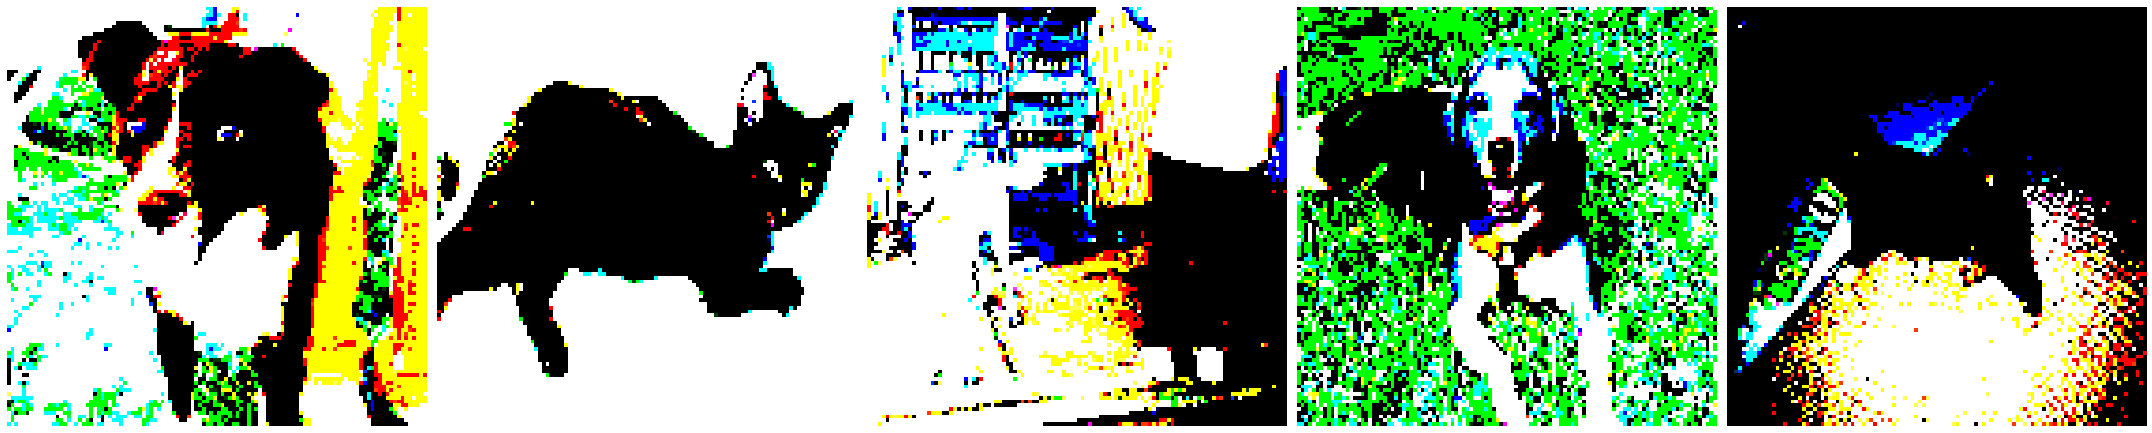

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0
 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1
 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0]


In [43]:
plotImages(test_imgs)
print(test_labels)
print(rounded_predictions)

In [85]:
traduzgatocachorro(labels)

['Dog', 'Dog', 'Cat', 'Cat', 'Dog']

In [46]:
def predictionCorrect():
    data = []
    for i in rounded_predictions:
        if i == 0:
            data.append("Dog")
        else:
            data.append("Cat")
                    
    return data

predictionCorrect()

['Cat',
 'Dog',
 'Cat',
 'Cat',
 'Cat',
 'Dog',
 'Cat',
 'Cat',
 'Dog',
 'Dog',
 'Dog',
 'Cat',
 'Dog',
 'Cat',
 'Dog',
 'Cat',
 'Cat',
 'Dog',
 'Cat',
 'Dog',
 'Dog',
 'Cat',
 'Dog',
 'Cat',
 'Cat',
 'Cat',
 'Dog',
 'Dog',
 'Dog',
 'Dog',
 'Cat',
 'Cat',
 'Dog',
 'Cat',
 'Dog',
 'Dog',
 'Dog',
 'Dog',
 'Dog',
 'Cat',
 'Dog',
 'Cat',
 'Dog',
 'Cat',
 'Dog',
 'Dog',
 'Dog',
 'Dog',
 'Dog',
 'Dog',
 'Dog',
 'Dog',
 'Dog',
 'Cat',
 'Cat',
 'Cat',
 'Dog',
 'Cat',
 'Dog',
 'Cat',
 'Dog',
 'Cat',
 'Dog',
 'Dog',
 'Cat',
 'Dog',
 'Dog',
 'Dog',
 'Cat',
 'Dog',
 'Dog',
 'Cat',
 'Dog',
 'Dog',
 'Cat',
 'Dog',
 'Cat',
 'Cat',
 'Dog',
 'Dog',
 'Dog',
 'Cat',
 'Cat',
 'Cat',
 'Dog',
 'Cat',
 'Dog',
 'Dog',
 'Dog',
 'Dog',
 'Dog',
 'Dog',
 'Dog',
 'Dog',
 'Dog',
 'Dog',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Dog',
 'Dog',
 'Dog',
 'Cat',
 'Cat',
 'Dog',
 'Cat',
 'Dog',
 'Dog',
 'Cat',
 'Cat',
 'Dog',
 'Dog',
 'Cat',
 'Dog',
 'Dog',
 'Dog',
 'Dog',
 'Cat',
 'Dog',
 'Cat',
 'Cat',
 'Cat',
 'Cat',


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


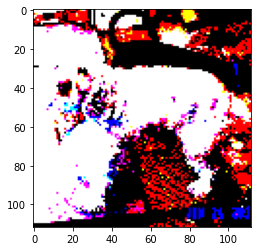

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


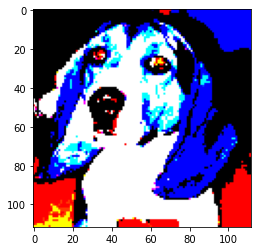

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


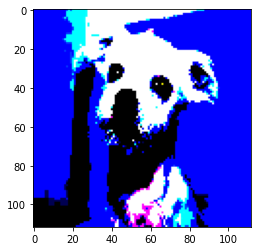

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


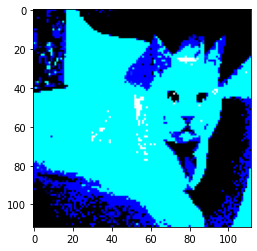

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


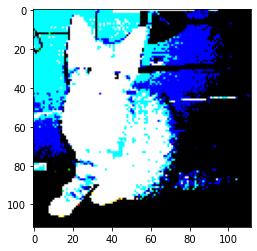

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


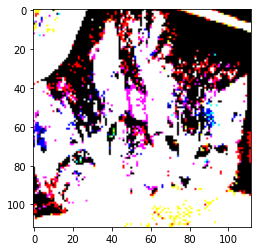

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


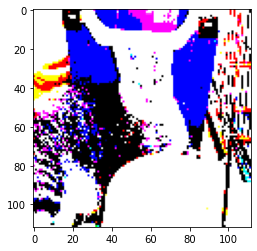

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


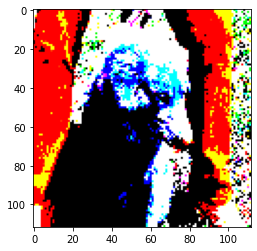

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


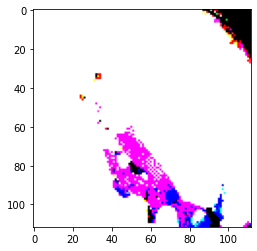

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


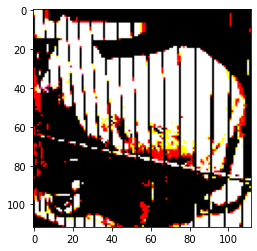

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


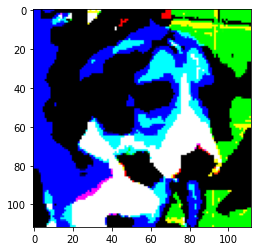

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


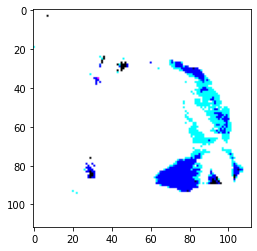

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


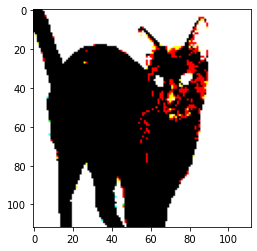

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


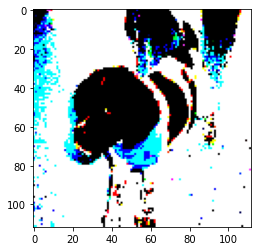

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


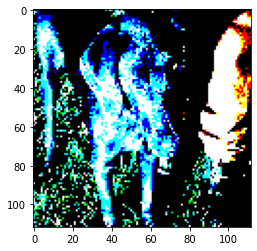

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


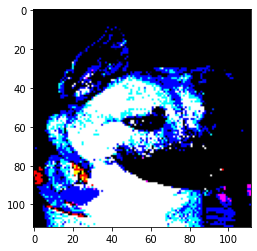

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


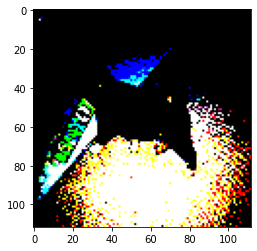

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


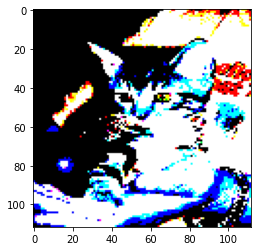

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


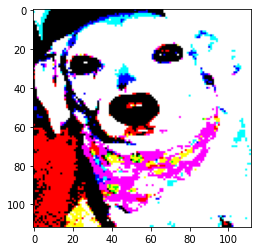

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


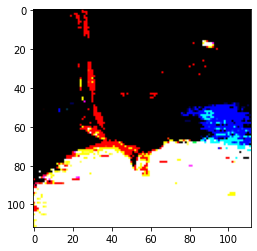

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


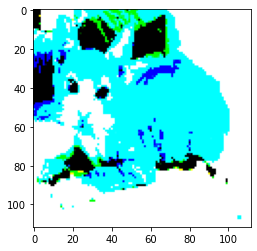

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


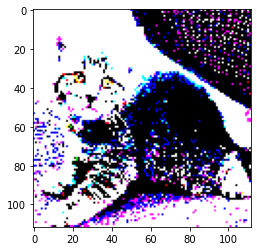

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


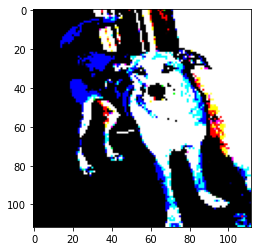

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


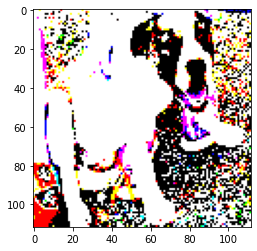

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


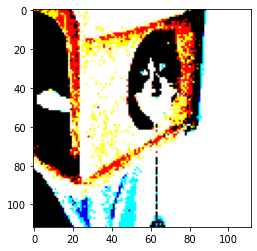

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


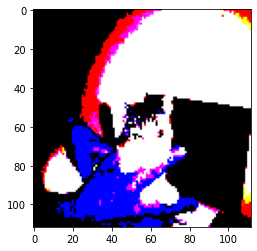

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


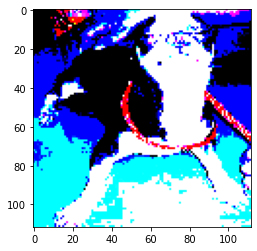

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


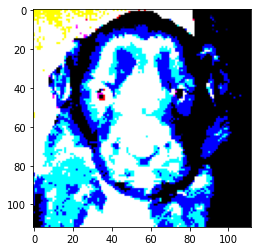

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


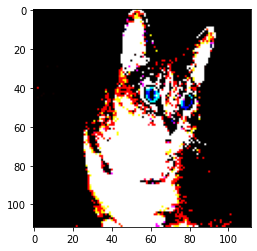

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


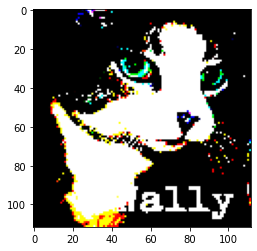

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


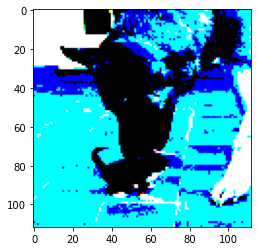

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


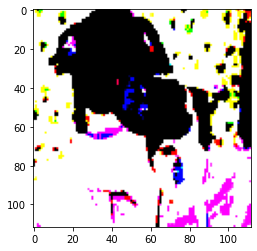

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


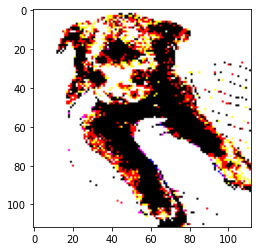

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


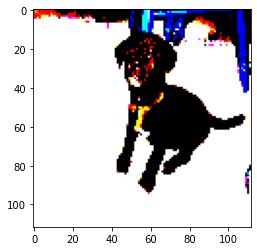

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


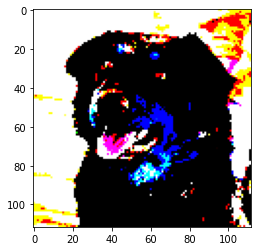

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


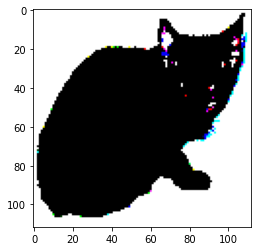

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


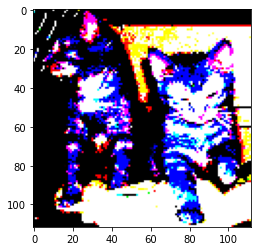

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


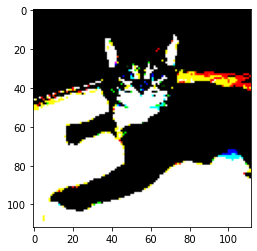

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


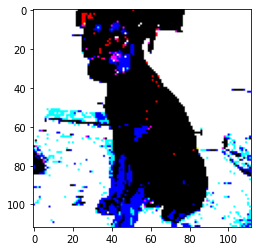

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


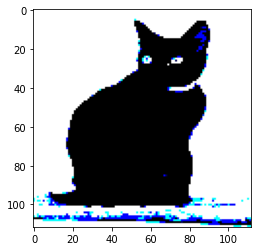

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


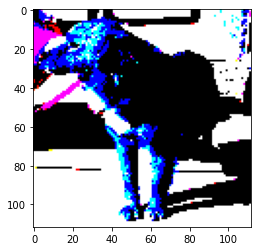

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


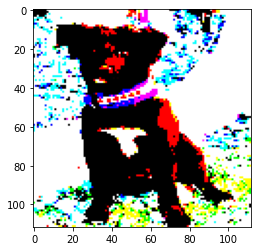

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


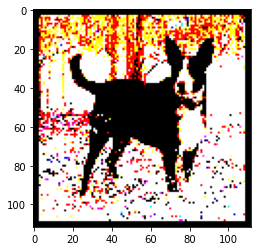

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


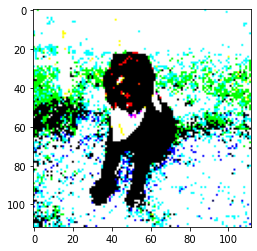

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


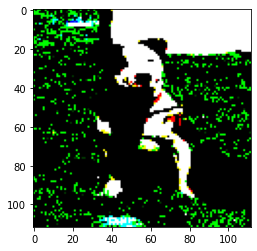

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


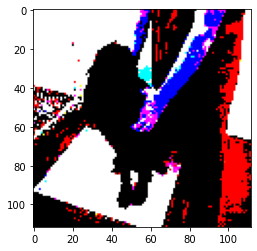

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


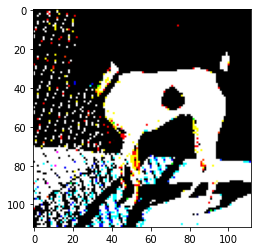

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


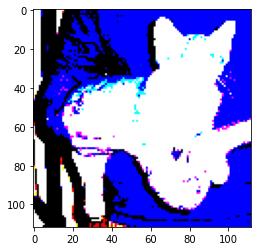

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


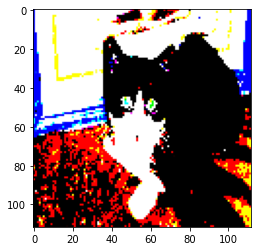

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


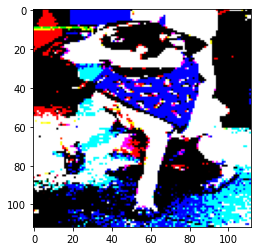

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


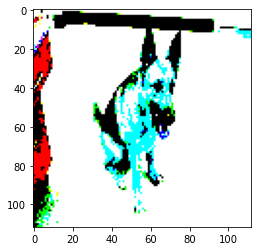

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


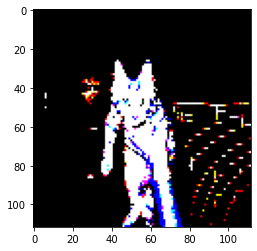

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


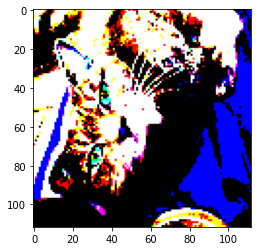

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


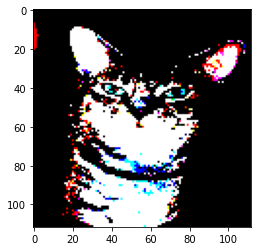

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


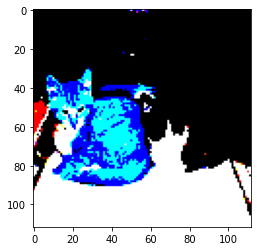

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


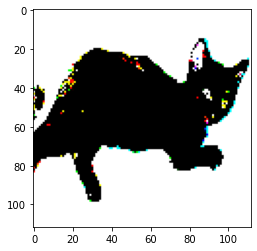

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


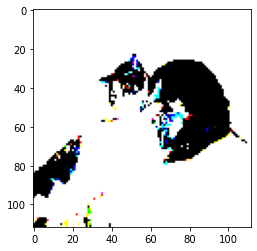

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


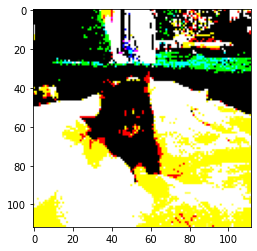

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


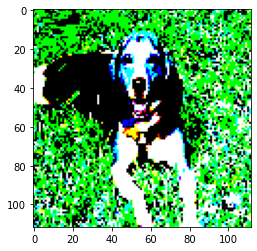

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


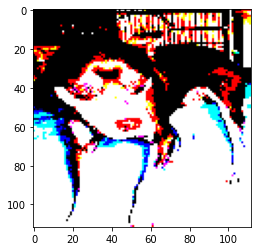

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


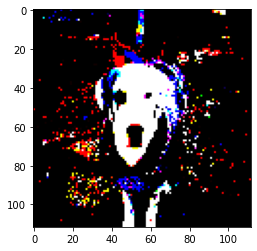

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


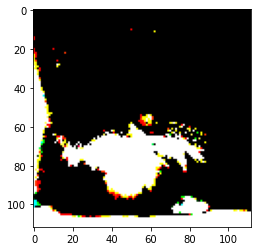

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


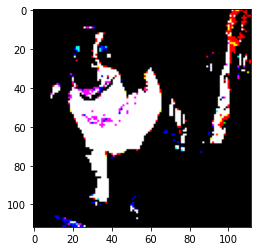

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


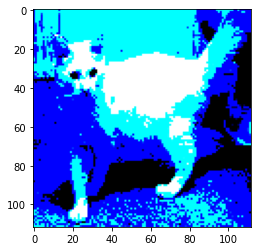

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


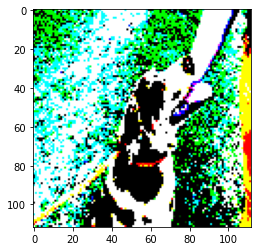

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


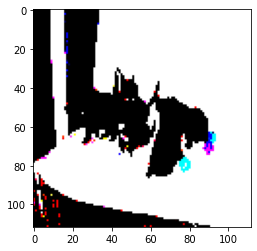

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


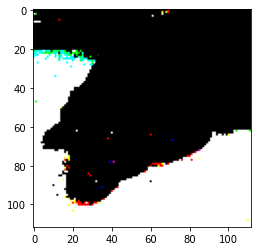

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


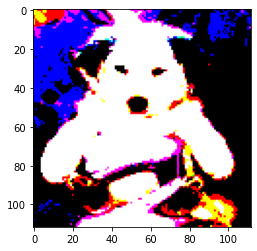

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


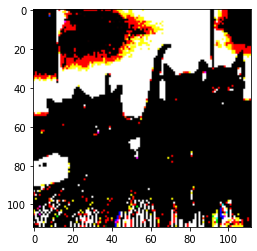

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


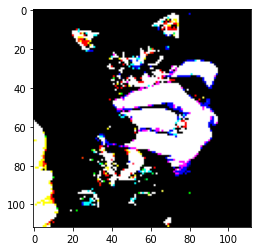

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


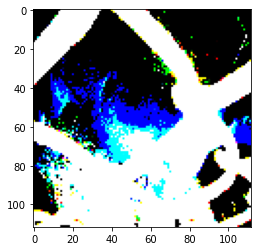

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


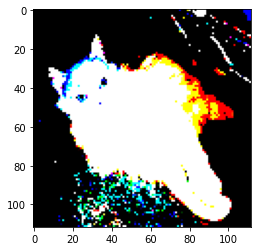

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


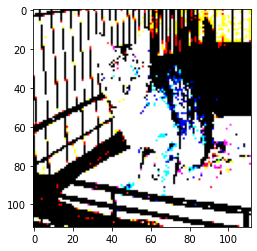

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


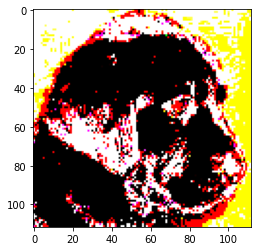

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


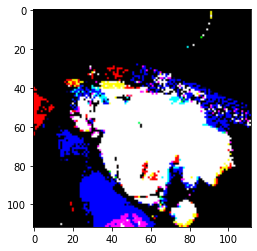

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


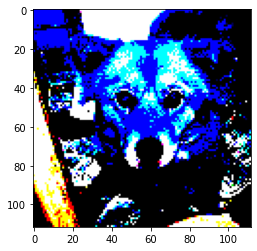

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


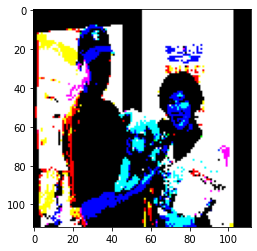

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


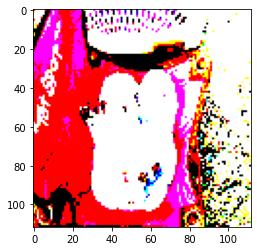

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


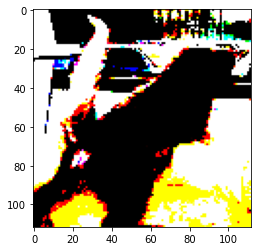

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


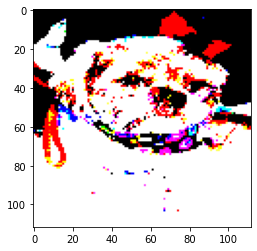

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


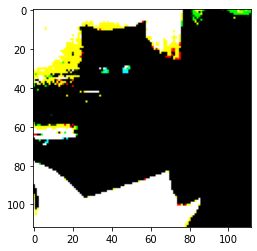

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


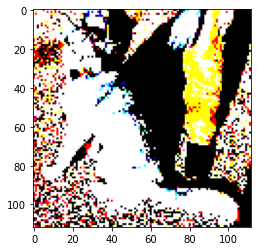

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


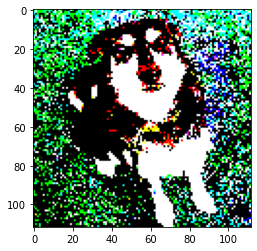

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


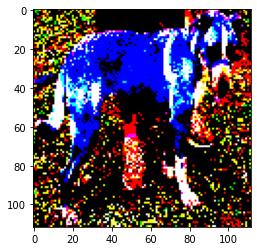

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


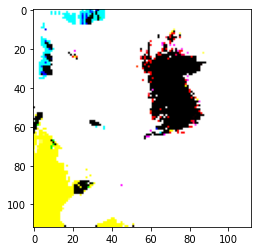

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


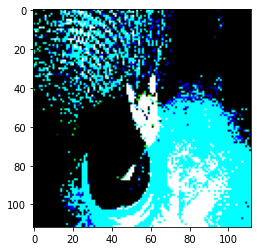

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


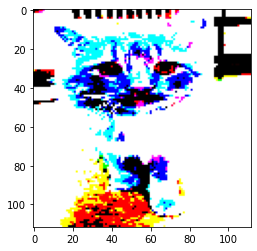

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


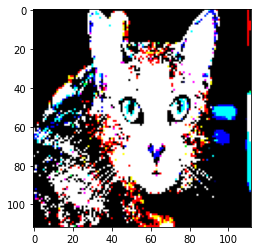

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


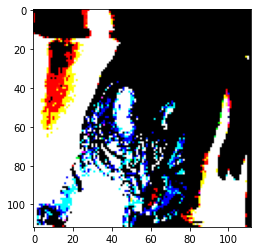

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


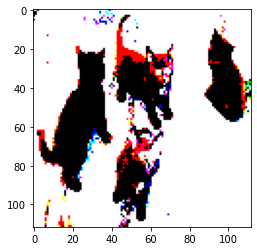

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


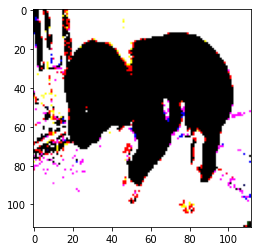

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


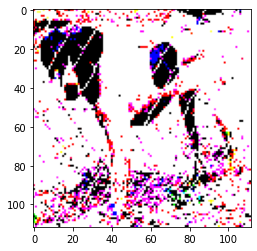

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


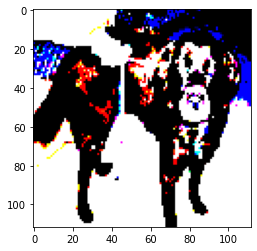

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


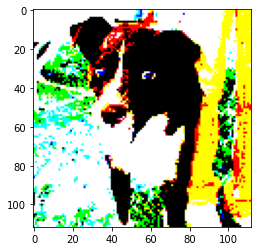

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


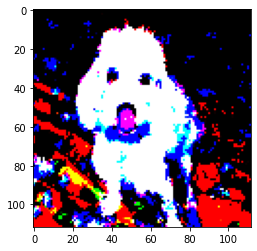

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


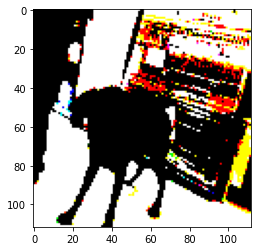

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


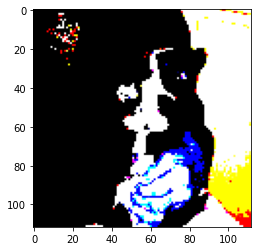

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


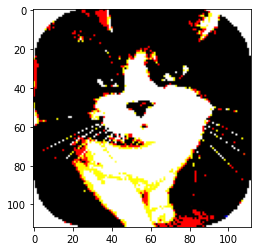

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


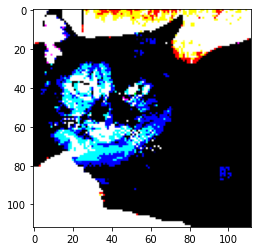

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


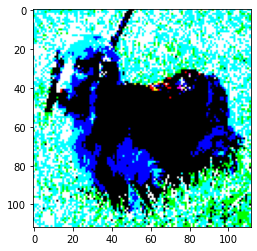

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


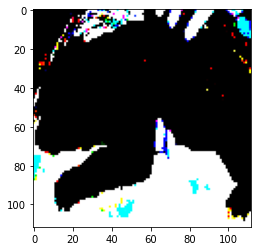

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


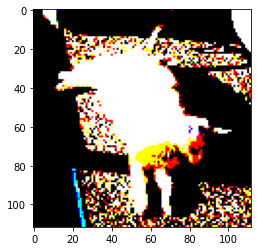

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


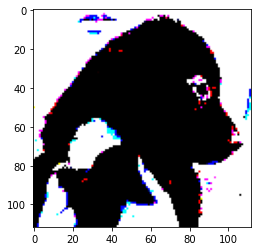

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


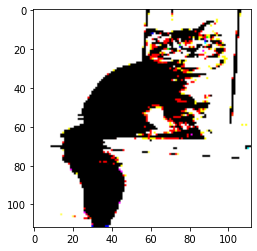

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


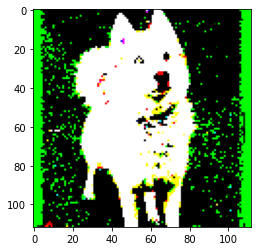

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


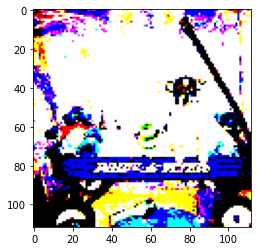

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


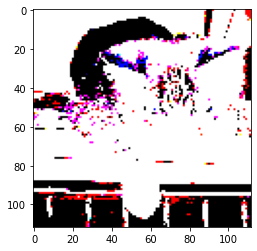

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


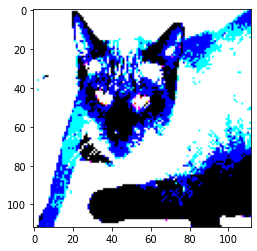

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


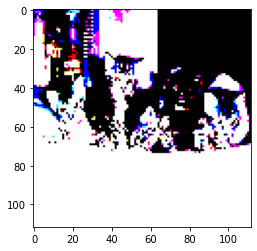

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


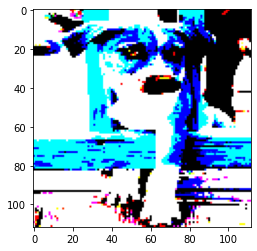

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


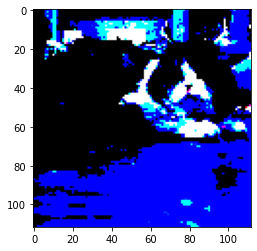

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


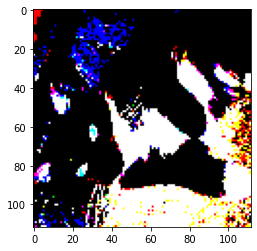

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


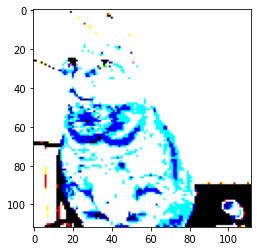

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


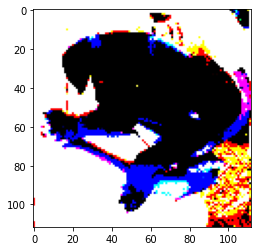

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


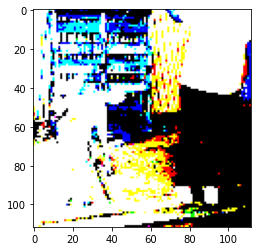

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


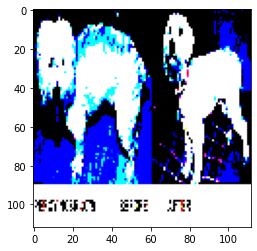

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


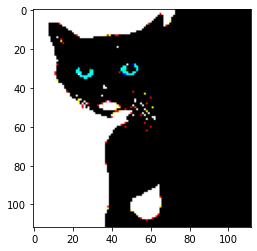

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


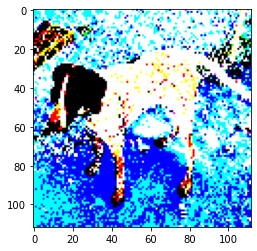

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


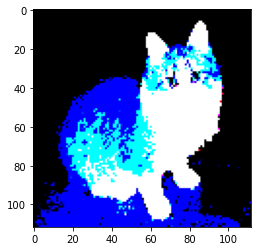

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


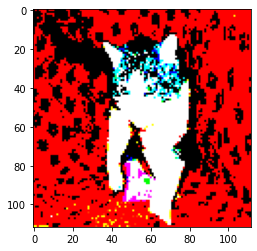

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


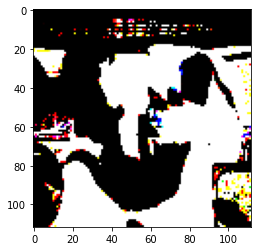

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


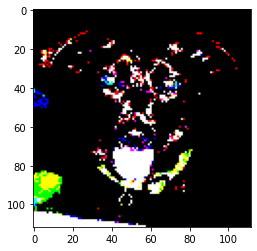

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


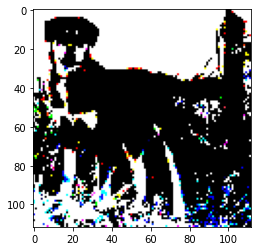

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


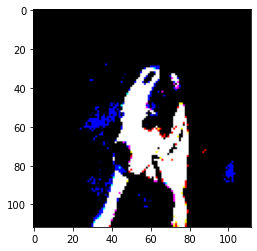

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


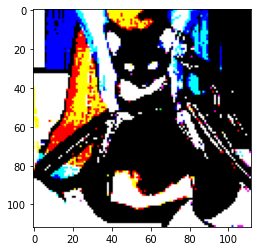

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


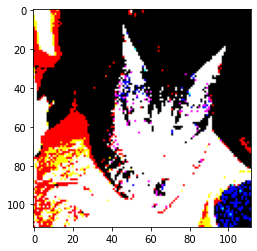

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


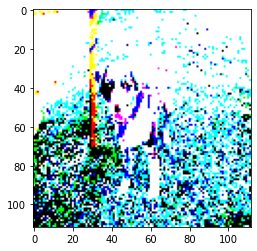

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


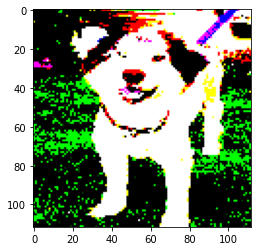

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


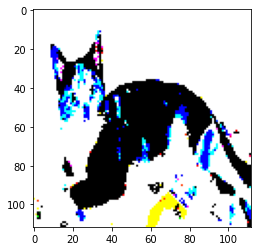

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


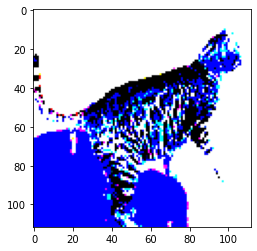

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


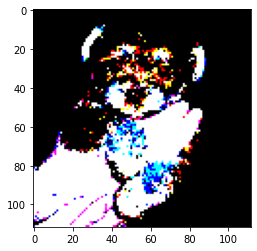

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


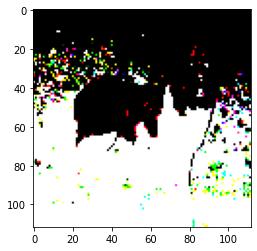

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


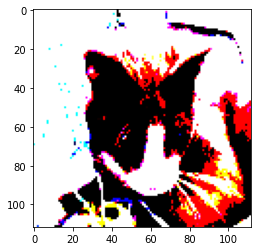

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


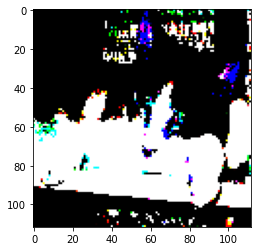

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


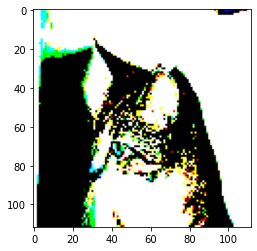

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


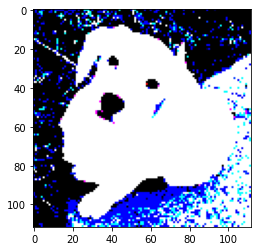

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Cat


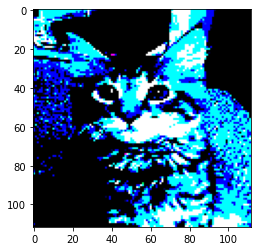

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Cat


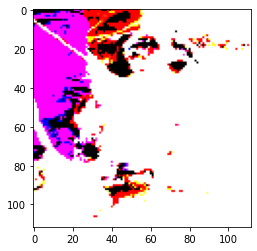

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Cat
Predição: Dog


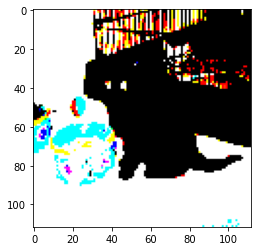

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original: Dog
Predição: Dog


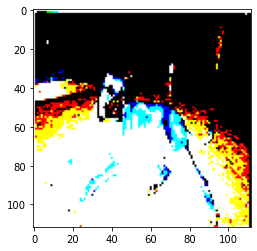

In [116]:
%matplotlib inline

imgs, labels = next(train_batches)

def predictionCorrect():
    data = []
    for i in rounded_predictions:
        if i == 0:
            data.append("Dog")
        else:
            data.append("Cat")
                    
    return data

CatsDogPre = predictionCorrect()

def traduzgatocachorro(array):
    dogcat = []
    
    for i in array:
        if i[0] == 0:
            dogcat.append("Dog")
        else: 
            dogcat.append("Cat")
            
    return dogcat

dogscats = traduzgatocachorro(labels)

def plotImages(images_arr):
    count = 0
    
    for img in images_arr:
        plt.imshow(img)
        print("Original: "+dogscats[count])
        print("Predição: "+CatsDogPre[count])
        count += 1
        plt.show()

plotImages(imgs)
